# Titanic: Machine Learning from Disaster

## 1. Introduction
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will try to use the knowledge from data science to analysis the relation between features and survival rate, and to predict some passengers' survival rate based on the features.



## 1.1 Aim
To predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable. (Binary Classification)

## 1.2 Variables

1. Age :
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2. Sibsp :

The dataset defines family relations in this way...

a. Sibling = brother, sister, stepbrother, stepsister

b. Spouse = husband, wife (mistresses and fiancés were ignored)


3. Parch:

The dataset defines family relations in this way...

a. Parent = mother, father

b. Child = daughter, son, stepdaughter, stepson

c. Some children travelled only with a nanny, therefore parch=0 for them.


4. Pclass :
A proxy for socio-economic status (SES).
1st = Upper
2nd = Middle
3rd = Lower


5. Embarked :
Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton


6. Name


7. Sex


8. Ticket:
Ticket number


9. Cabin:
is a nominal datatype that can be used in feature engineering


10. Fare:
Indicating the fare


11. PassengerID:
Unique passenger id


12. Survival:
dependent variable , 0 or 1

## 2. Analysing Data
In this section, we will try to explore our data to know what kind of data we are dealing with and to have a brief idea of features.

### 2.1 Data importing and brief analysing
We use Pandas, a Python library, to read the "train.csv" and "test.csv", and to show a first look of the dataset.

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train data CSV files (using direct filename)
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


In [3]:
#import train data CSV files (using \\)
data = pd.read_csv("C:\\Users\\Jayanti\\Downloads\\Guru School\\DS with Python\\Files\\ML Case Study - Titanic Disaster\\train.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


In [4]:
#import train data CSV files (using /)
data = pd.read_csv("C:/Users/Jayanti/Downloads/Guru School/DS with Python/Files/ML Case Study - Titanic Disaster/train.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


In [5]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


In [6]:
# Subsetting Rows
data[0:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1


In [7]:
# Subsetting columns
data[['PassengerId']]

,PassengerId
0,1
1,2
2,3
3,4
4,5
...,...
886,887
887,888
888,889
889,890


In [8]:
# Number of rows & columns of data
data.shape

(891, 12)

In [9]:
#get a list of the features within the dataing dataset
print(data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


In [10]:
# data types of coulumns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


## Types Of Features
### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: PClass

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Age

In [12]:
#Descriptive analysis on the numerical data
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.00,891.00,714.00,891.00,891.00,891.00,891.00
mean,446.00,2.31,29.70,0.52,0.38,32.20,0.38
std,257.35,0.84,14.53,1.10,0.81,49.69,0.49
min,1.00,1.00,0.42,0.00,0.00,0.00,0.00
25%,223.50,2.00,20.12,0.00,0.00,7.91,0.00
50%,446.00,3.00,28.00,0.00,0.00,14.45,0.00
75%,668.50,3.00,38.00,1.00,0.00,31.00,1.00
max,891.00,3.00,80.00,8.00,6.00,512.33,1.00


In [13]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


In [14]:
#Descriptive analysis on the categorical data
data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",male,1601,G6,S
freq,1,577,7,4,644


In [15]:
data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
C106           1
A7             1
E63            1
C49            1
B94            1
Name: Cabin, Length: 147, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2.2 Data analysis and visualisation
As we stated above, the Survived column would be our target, and other columns are features. We already had an idea about what type of data do we have and how it looks like. Now let's try to visualize the data in data.csv to see whether the features really related to suvive rate.

### 1) Overall survival status

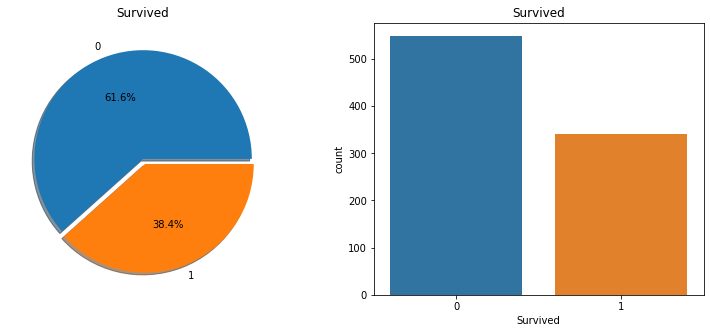

Overall, in data.csv, only about 38.4% people survived.


In [17]:
#visualize the survival states
f,ax=plt.subplots(1,2,figsize=(13,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

print("Overall, in data.csv, only about 38.4% people survived.")

In [18]:
count_survived = data[data['Survived']==1]['Survived'].count()
count_notsurvived = data[data['Survived']==0]['Survived'].count()

count_survived_pc = ((count_survived*100)//(count_survived+count_notsurvived))

print("The count of survived passengers is ", count_survived)
print("The % survived passengers is ", count_survived_pc)

The count of survived passengers is  342
The % survived passengers is  38


### 2) Pclass Feature

Text(0.5, 1.0, 'Relationship between Survived and P-Class')

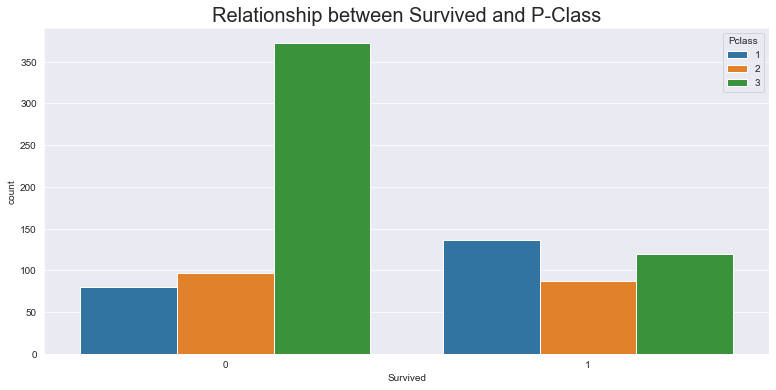

In [19]:
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = (13,6)
sns.countplot(x='Survived',hue='Pclass',data=data)
plt.title("Relationship between Survived and P-Class", size=20)

### 3) Sex Feature

Text(0.5, 1.0, 'Relationship between Survived and Sex of the passenger')

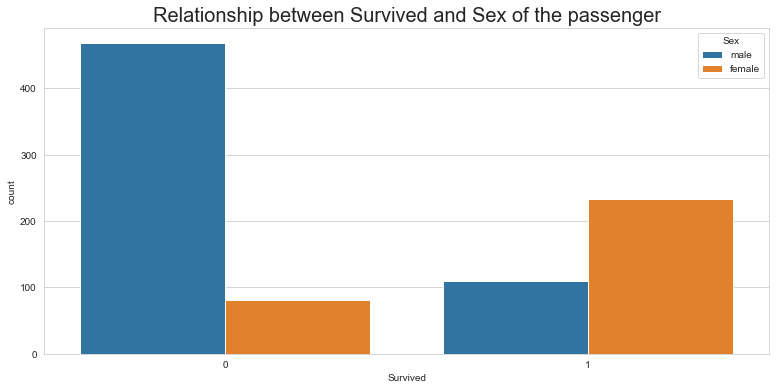

In [20]:
#draw a bar plot o by sex
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (13,6)
sns.countplot(x='Survived',hue='Sex',data=data)
plt.title("Relationship between Survived and Sex of the passenger", size=20)

### 4) Age Feature

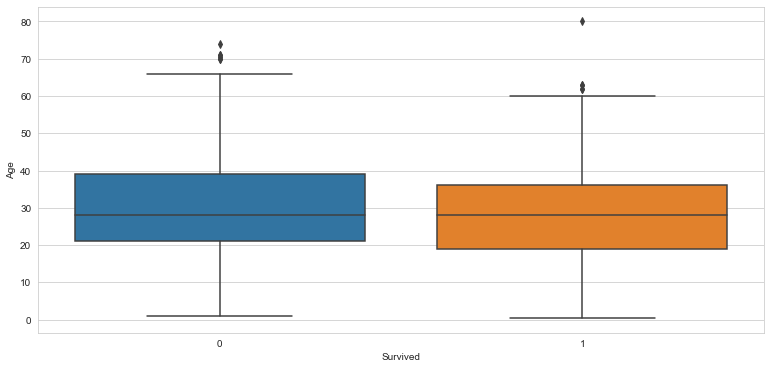

In [31]:
sns.boxplot(data=data, x="Survived", y="Age")
plt.show()

Text(0.5, 1.0, 'Histogram of Age for Survived=1')

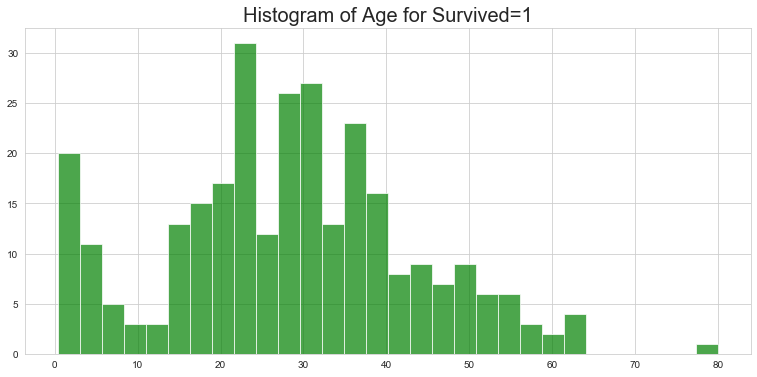

In [21]:
data['Age'][data['Survived']==1].hist(bins=30,color='green',alpha=0.7)
plt.title("Histogram of Age for Survived=1", size=20)

Text(0.5, 1.0, 'Histogram of Age for Survived=0')

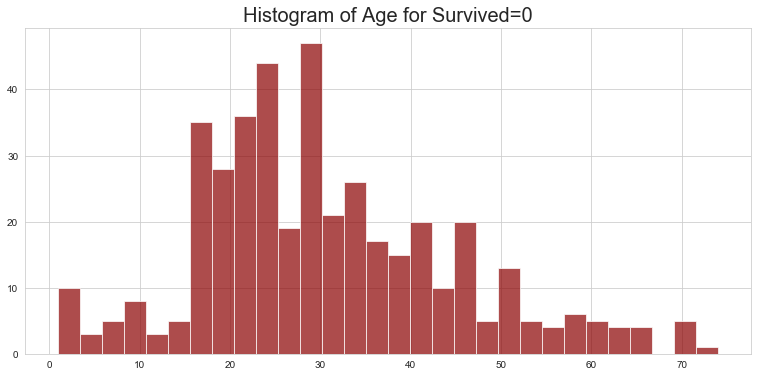

In [22]:
data['Age'][data['Survived']==0].hist(bins=30,color='darkred',alpha=0.7)
plt.title("Histogram of Age for Survived=0", size=20)

### 5) Sibling-Spouse Feature

Text(0.5, 1.0, 'Frequency of Siblings-Spouse')

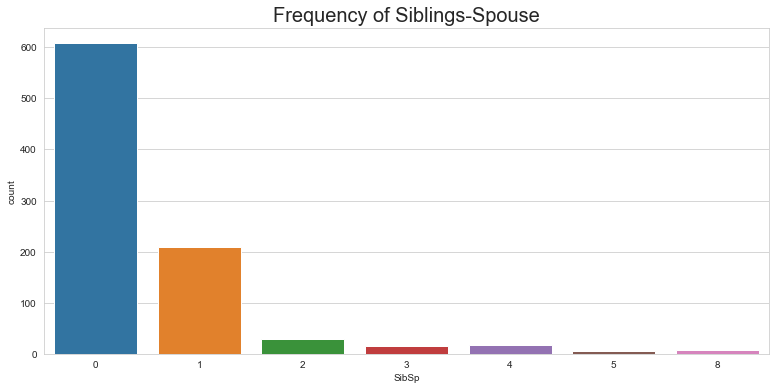

In [23]:
sns.countplot(x='SibSp',data=data)
plt.title("Frequency of Siblings-Spouse", size=20)

Text(0.5, 1.0, 'Relationship between Survived and Siblings-Spouse')

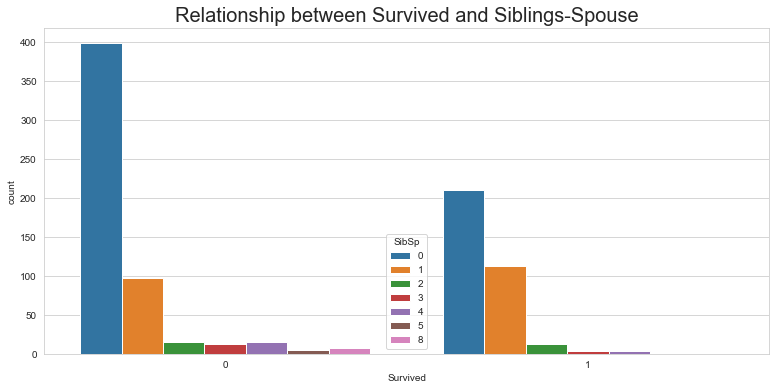

In [24]:
#draw a bar plot o by sex
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (13,6)
sns.countplot(x='Survived',hue='SibSp',data=data)
plt.title("Relationship between Survived and Siblings-Spouse", size=20)

### 6) Parents-Children Feature

Text(0.5, 1.0, 'Frequency of Parents-Children')

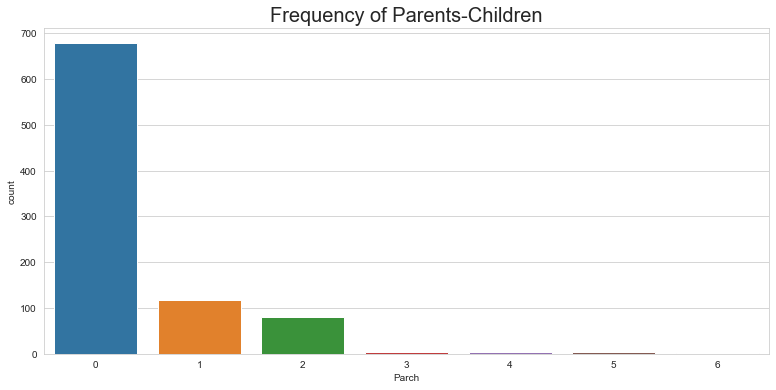

In [25]:
sns.countplot(x='Parch',data=data)
plt.title("Frequency of Parents-Children", size=20)

Text(0.5, 1.0, 'Relationship between Survived and Parents-Children')

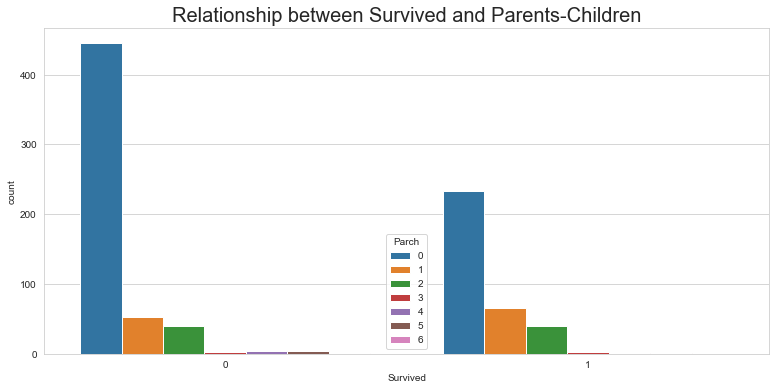

In [26]:
#draw a bar plot o by sex
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (13,6)
sns.countplot(x='Survived',hue='Parch',data=data)
#plt.legend(loc='upper right')
plt.title("Relationship between Survived and Parents-Children", size=20)

### 7) Fare Feature

Text(0.5, 1.0, 'Histogram of Fare for Survived=1')

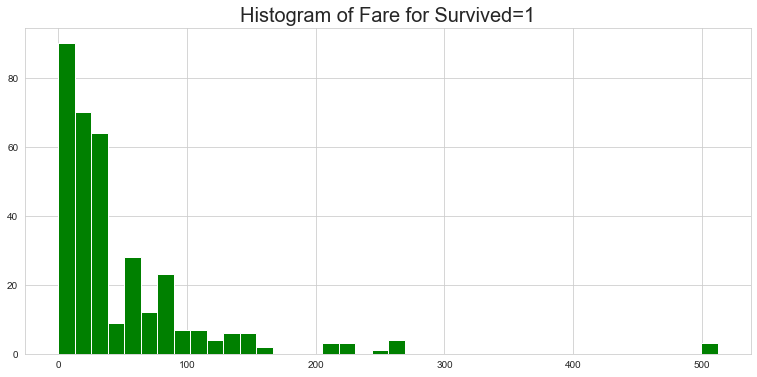

In [27]:
data['Fare'][data['Survived']==1].hist(color='green',bins=40,figsize=(13,6))
plt.title("Histogram of Fare for Survived=1", size=20)

Text(0.5, 1.0, 'Histogram of Fare for Survived=0')

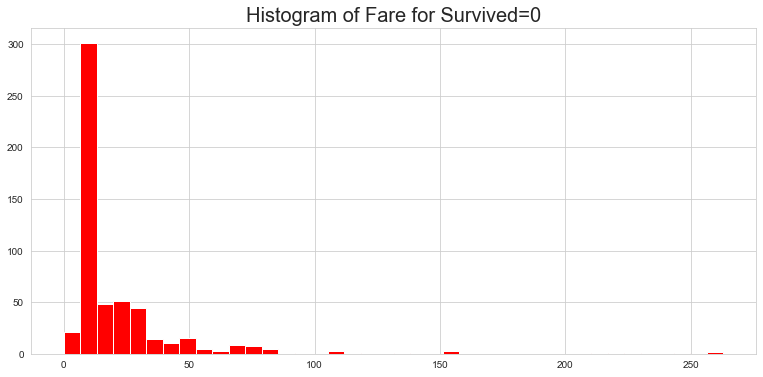

In [28]:
data['Fare'][data['Survived']==0].hist(color='red',bins=40,figsize=(13,6))
plt.title("Histogram of Fare for Survived=0", size=20)

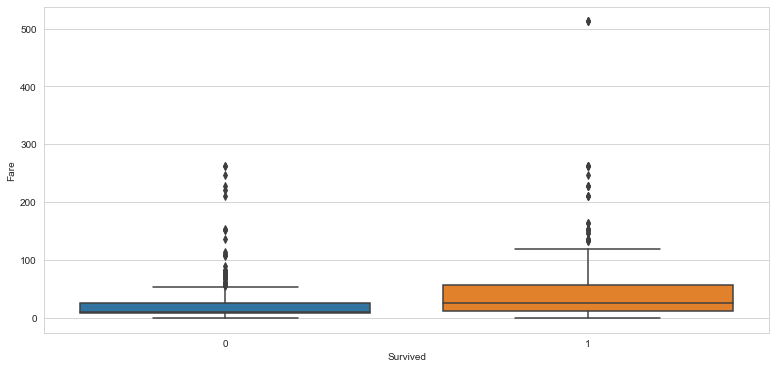

In [30]:
sns.boxplot(data=data, x="Survived", y="Fare")
plt.show()

### 8) Embarked Feature

Text(0.5, 1.0, 'Relationship between Survived and Embarked')

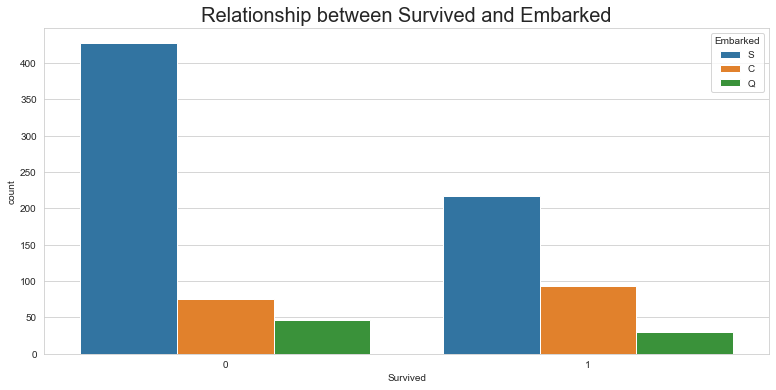

In [29]:
#draw a bar plot o by sex
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (13,6)
sns.countplot(x='Survived',hue='Embarked',data=data)
plt.title("Relationship between Survived and Embarked", size=20)

## 2. 3 Data Preparation:

In [32]:
data.shape

(891, 12)

In [34]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,1


In [33]:
#count missing data in data.csv
data.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [36]:
#count missing data in data.csv
print(pd.isnull(data).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64


In [39]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0


In [44]:
# As more than 75% of the Cabin feature are missing, it is a bit hard to deal with it.
data.drop('Cabin',axis=1, inplace=True)

In [45]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S,0


In [46]:
#count missing data in data.csv
print(pd.isnull(data).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64


In [47]:
# Remove records with missing values (Age & Embarked)
data.dropna(inplace=True)

In [48]:
#count missing data in data.csv
print(pd.isnull(data).sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64


In [49]:
data.shape

(712, 11)

### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
Survived       712 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [51]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [52]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [53]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [54]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [55]:
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,1,3,22.00,1,0,7.25,0
1,2,1,38.00,1,0,71.28,1
2,3,3,26.00,0,0,7.92,1
3,4,1,35.00,1,0,53.10,1
4,5,3,35.00,0,0,8.05,0


In [56]:
data = pd.concat([data,sex,embark],axis=1)

In [57]:
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,1,3,22.00,1,0,7.25,0,1,0,1
1,2,1,38.00,1,0,71.28,1,0,0,0
2,3,3,26.00,0,0,7.92,1,0,0,1
3,4,1,35.00,1,0,53.10,1,0,0,1
4,5,3,35.00,0,0,8.05,0,1,0,1


## Great! Our data is ready for our model!

## 3. Building a Logistic Regression model
Let's start by splitting our data into a dataing set and test set (there is another test.csv file that you can play around with in case you want to use all this data for dataing).

### data Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = data.drop(['Survived'],axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.00,1,0,7.25,1,0,1
1,2,1,38.00,1,0,71.28,0,0,0
2,3,3,26.00,0,0,7.92,0,0,1
3,4,1,35.00,1,0,53.10,0,0,1
4,5,3,35.00,0,0,8.05,1,0,1


In [60]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, 
                                                    random_state=101)

In [62]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
66,67,2,29.00,0,0,10.50,0,0,1
813,814,3,6.00,4,2,31.27,0,0,1
830,831,3,15.00,1,0,14.45,0,0,0
741,742,1,36.00,1,0,78.85,1,0,1
581,582,1,39.00,1,1,110.88,0,0,0


In [63]:
y_train.head()

66     1
813    0
830    1
741    0
581    1
Name: Survived, dtype: int64

In [64]:
# Dimensions
print("Train Data:",X_train.shape)
print("Test Data:",X_test.shape)

Train Data: (569, 9)
Test Data: (143, 9)


In [65]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
66,67,2,29.00,0,0,10.50,0,0,1
813,814,3,6.00,4,2,31.27,0,0,1
830,831,3,15.00,1,0,14.45,0,0,0
741,742,1,36.00,1,0,78.85,1,0,1
581,582,1,39.00,1,1,110.88,0,0,0


In [66]:
y_train.head()

66     1
813    0
830    1
741    0
581    1
Name: Survived, dtype: int64

### Training and Predicting

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### What is Logistic Regression?

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.


<div style="text-align: center;">
    <img src="http://juangabrielgomila.com/wp-content/uploads/2015/04/LogReg_1.png" style="max-width: 600px; width:100%;" />
</div>

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [71]:
X_test.shape

(143, 9)

In [72]:
len(y_pred)

143

### Evaluation

We can check `'accuracy'` of the model for evaluating the performance

In [73]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score, precision_score, recall_score
from sklearn import metrics #accuracy measure

In [74]:
print(confusion_matrix(y_test,y_pred))

[[71 13]
 [20 39]]


In [75]:
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))
print("Recall: ",round(recall_score(y_test,y_pred),2))
print("F1 Score: ",round(f1_score(y_test,y_pred),2)) 

Accuracy:  0.77
Precision:  0.75
Recall:  0.66
F1 Score:  0.7


## Decision Tree Classifier

<div style="text-align: center;">
    <img src="https://miro.medium.com/max/820/1*JAEY3KP7TU2Q6HN6LasMrw.png" style="max-width: 600px; width:100%;" />
</div>

In [76]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
model = tree.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))
print("Recall: ",round(recall_score(y_test,y_pred),2))
print("F1 Score: ",round(f1_score(y_test,y_pred),2)) 

Accuracy:  0.78
Precision:  0.78
Recall:  0.64
F1 Score:  0.7


## Random Forest Classifier

<div style="text-align: center;">
    <img src="https://miro.medium.com/max/1200/0*YEwFetXQGPB8aDFV" style="max-width: 600px; width:100%;" />
</div>

In [77]:
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))
print("Recall: ",round(recall_score(y_test,y_pred),2))
print("F1 Score: ",round(f1_score(y_test,y_pred),2)) 

Accuracy:  0.78
Precision:  0.7
Recall:  0.8
F1 Score:  0.75


## Support Vector Classifier Classifier

<div style="text-align: center;">
    <img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/kernel.png" style="max-width: 600px; width:100%;" />
</div>

In [78]:
svm = SVC(kernel='linear')
model = svm.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),2))
print("Precision: ",round(precision_score(y_test,y_pred),2))
print("Recall: ",round(recall_score(y_test,y_pred),2))
print("F1 Score: ",round(f1_score(y_test,y_pred),2)) 

Accuracy:  0.78
Precision:  0.74
Recall:  0.71
F1 Score:  0.72
